In [1]:
#1. Import the necessary libraries

In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_1samp
from statsmodels.stats.proportion import proportions_ztest
import math  
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
%matplotlib inline

In [153]:
#2. Read the data as a data frame

In [123]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [40]:
#3a. Shape of the data

In [41]:
df.shape

(1338, 7)

In [42]:
#3b. Data type of each attribute

In [43]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [44]:
#3c. Checking the presence of missing values

In [45]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [46]:
#3d. point summary of numerical attributes (Sample Minimum, First Quartile, Median, Third Quartile and Sample Maximum)

In [47]:
df.min()

age                18
sex            female
bmi             15.96
children            0
smoker             no
region      northeast
charges       1121.87
dtype: object

In [48]:
df.quantile(q=0.25)

age           27.00000
bmi           26.29625
children       0.00000
charges     4740.28715
Name: 0.25, dtype: float64

In [49]:
df.median()

age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

In [50]:
df.quantile(q=0.75)

age            51.000000
bmi            34.693750
children        2.000000
charges     16639.912515
Name: 0.75, dtype: float64

In [51]:
df.max()

age                64
sex              male
bmi             53.13
children            5
smoker            yes
region      southwest
charges       63770.4
dtype: object

In [52]:
#Other attributes can be obtained by using describe command

In [53]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [54]:
#3e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

Text(0.5,1,'BMI Distribuiton')

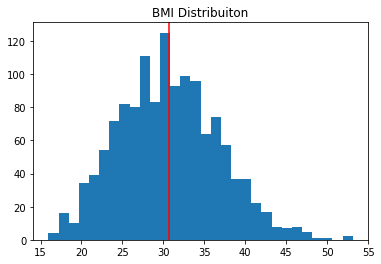

In [55]:
plt.hist( df['bmi'],bins=30)
plt.axvline(x=30.663397,c='r')
plt.title("BMI Distribuiton")

Text(0.5,1,'Age Distribuiton')

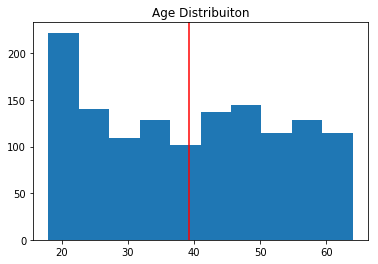

In [56]:
plt.hist( df['age'],bins=10)
plt.axvline(x=39.207025,c='r')
plt.title("Age Distribuiton")

Text(0.5,1,'Charges Distribuiton')

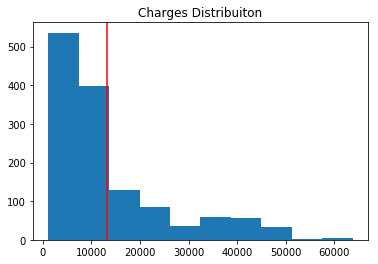

In [189]:
plt.hist( df['charges'],bins=10)
plt.axvline(x=13270.422265,c='r')
plt.title("Charges Distribuiton")

In [58]:
#3f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [59]:
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [60]:
#Since the skew outputs are positive all the numeric features are right tailed/positively skewed.

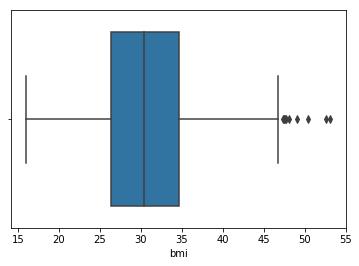

In [106]:
#3g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges' columns
# In boxplot, outliers are plotted as dots, whereas other population will be grouped together and display as boxes
sns.boxplot(x=df['bmi'])

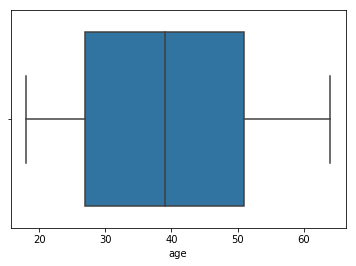

In [110]:
sns.boxplot(x=df['age'])

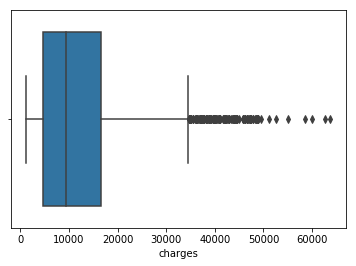

In [111]:
sns.boxplot(x=df['charges'])

In [ ]:
# 3h. Distribution of categorical columns (include children)

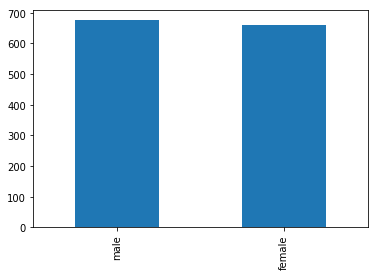

In [116]:
pd.value_counts(df['sex']).plot.bar()

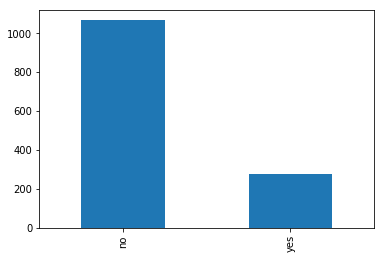

In [117]:
pd.value_counts(df['smoker']).plot.bar()

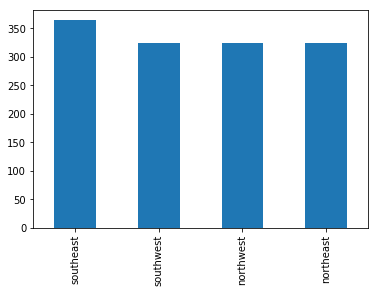

In [118]:
pd.value_counts(df['region']).plot.bar()

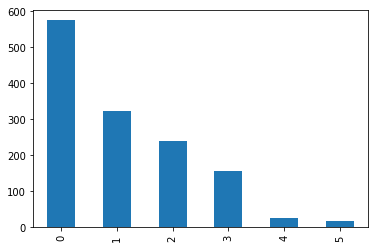

In [119]:
pd.value_counts(df['children']).plot.bar()

In [120]:
# 3i. Pair plot that includes all the columns of the data frame

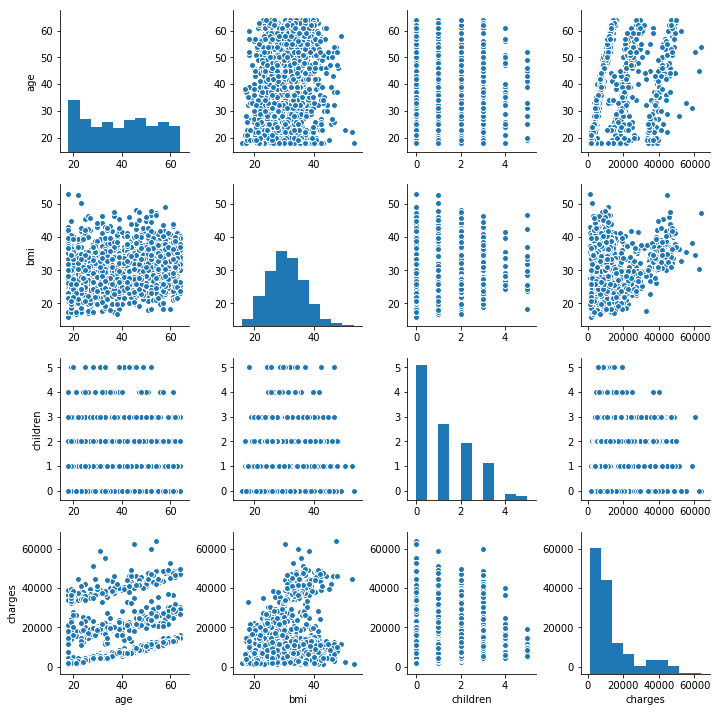

In [121]:
sns.pairplot(df)

In [124]:
#4a. Do charges of people who smoke differ significantly from the people who don't?
# We will do a null hypothesis on both data samples.
# These are independent samples. 
# Tiny P-value indicates a very significant result. We are considering significant value as 5% or 0.05
# In our case, P-value is less than the significant value, 
# Hence Charges of people who smoke differ significantly from the people who dont

In [178]:
smoker_df = df.loc[df['smoker'] == 'yes']
nonsmoker_df = df.loc[df['smoker'] == 'no']
t, p = stats.ttest_ind(smoker_df['charges'], nonsmoker_df['charges'], equal_var=False)
print("ttest_ind: t = %g  p = %g" % (t, p))
alpha = 0.05
if p > alpha:
	print('Null hypothesis cannot be rejected.')
else:
	print('Reject the null hypothesis.')

ttest_ind: t = 32.7519  p = 5.88946e-103
Reject the null hypothesis.


In [ ]:
# 4b. Does bmi of males differ significantly from that of females?
# In this case, the p-value is larger than 0.05, we cannot conclude that a significant difference exists. 

In [179]:
male_df = df.loc[df['sex'] == 'male']
female_df = df.loc[df['sex'] == 'female']
t, p = stats.ttest_ind(male_df['bmi'], female_df['bmi'], equal_var=False)
print("ttest_ind: t = %g  p = %g" % (t, p))
alpha = 0.05
if p > alpha:
	print('Null hypothesis cannot be rejected.')
else:
	print('Reject the null hypothesis.')

ttest_ind: t = 1.69703  p = 0.0899243
Null hypothesis cannot be rejected.


In [ ]:
# 4c. Is the proportion of smokers significantly different in different genders?
# We are getting zscore of 1.24 and pvalue of 0.213


In [187]:
male_smoker_df = male_df.loc[df['smoker'] == 'yes']
female_smoker_df = female_df.loc[df['smoker'] == 'yes']
male_smoker_prop = male_smoker_df.count() / male_df.count()
female_smoker_prop = female_smoker_df.count() / female_df.count()
smoker_prop = (male_smoker_df.count() + female_smoker_df.count())/(male_df.count() + female_df.count())

var = smoker_prop * (1 - smoker_prop) * (1/male_smoker_df.count() + 1/female_smoker_df.count())
zscore = np.abs(female_smoker_prop - male_smoker_prop)/np.sqrt(var)
one_side = 1 - stats.norm(loc = 0, scale = 1).cdf(zscore)
pvalue = one_side * 2
print('zscore: {}'.format(zscore['smoker']))
print('pvalue: {}'.format(pvalue))

zscore: 1.2447851536164207
pvalue: [ 0.21321073  0.21321073  0.21321073  0.21321073  0.21321073  0.21321073
  0.21321073]


In [188]:
# 4d. Is the distribution of bmi across women with no children, one child and two children, the same ?

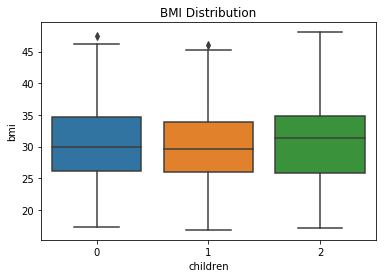

In [193]:
df0 = female_df.loc[df['children'] == 0]
df1 = female_df.loc[df['children'] == 1]
df2 = female_df.loc[df['children'] == 2]
child_df = pd.DataFrame()
child_df = child_df.append(df0) 
child_df = child_df.append(df1)
child_df = child_df.append(df2)

sns.boxplot(x = "children", y = "bmi", data = child_df)
plt.title('BMI Distribution')
plt.show()

In [197]:
mod = ols('bmi ~ children', data = child_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F   PR(>F)
children      2.512982    1.0  0.068411  0.79376
Residual  20717.738725  564.0       NaN      NaN


In [201]:
print(pairwise_tukeyhsd(child_df['bmi'], child_df['children']))

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  0      1    -0.3089  -1.7186 1.1008 False 
  0      2     0.2883  -1.2636 1.8402 False 
  1      2     0.5971  -1.1323 2.3265 False 
--------------------------------------------


In [202]:
#Since the result - reject is false for all three comparisons (0 vs 1 child, 0 vs 2 children and 1 vs 2 children)
#BMI is statistically equal in all three cases.